World Happiness Report Project

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capital, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [730]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [731]:
!pip install imbalanced-learn

In [733]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [985]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# # Exploratory Data Analysis


In [986]:
#checking the dimension of the dataset

df.shape

(158, 12)

In [987]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [988]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [989]:
#checking the types of columns
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [990]:
df_columns=['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
df_columns

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [991]:
happy_df=df.rename({'Country':'country_name','Region':'region','Happiness Rank':'happiness_rank','Happiness Score':'happiness_score','Standard Error':'standard_error','Economy (GDP per Capita)':'economy_gdp','Family':'family','Health (Life Expectancy)':'health','Freedom':'freedom','Trust (Government Corruption)':'gov_trust','Generosity':'generosity','Dystopia Residual':'residual'})


In [992]:
happy_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [993]:
df.tail

<bound method NDFrame.tail of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.

In [994]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [995]:
df.isnull().sum().sum()

0

In [996]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [997]:
print(f"The rows and columns in the dataset:{df.shape}")
print(f"\nThe column headers in the dataset:{df.columns}")

The rows and columns in the dataset:(158, 12)

The column headers in the dataset:Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [998]:
print("Min. Happiness rank:",df["Happiness Rank"].min())
print("Max. Happiness rank:",df["Happiness Rank"].max())

Min. Happiness rank: 1
Max. Happiness rank: 158


In [999]:
print("Min. Happiness score:",df["Happiness Score"].min())
print("Max. Happiness score:",df["Happiness Score"].max())

Min. Happiness score: 2.839
Max. Happiness score: 7.587


In [1000]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

As we can see there are no null values present in this dataset.

<AxesSubplot:>

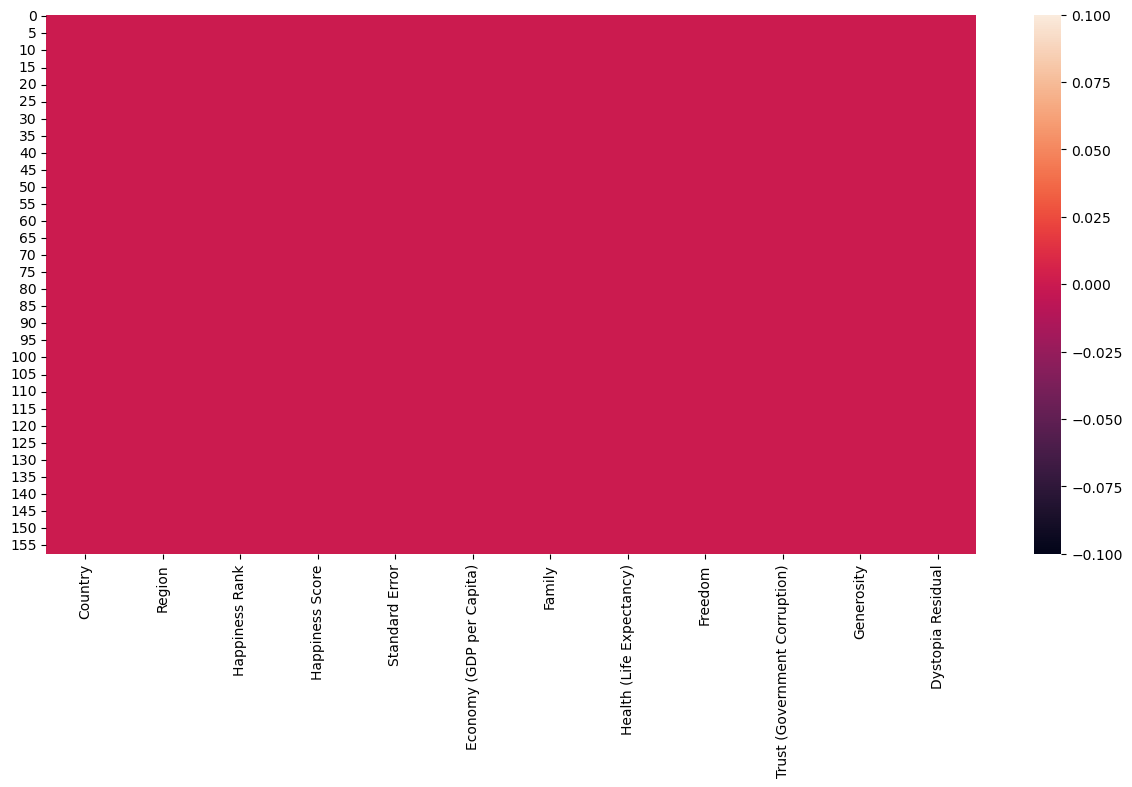

In [1001]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

In [1002]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [1003]:
df['Happiness Score'].nunique()

157

In [1004]:
#checking the value counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [1005]:
df.iloc[157,:]

Country                                        Togo
Region                           Sub-Saharan Africa
Happiness Rank                                  158
Happiness Score                               2.839
Standard Error                              0.06727
Economy (GDP per Capita)                    0.20868
Family                                      0.13995
Health (Life Expectancy)                    0.28443
Freedom                                     0.36453
Trust (Government Corruption)               0.10731
Generosity                                  0.16681
Dystopia Residual                           1.56726
Name: 157, dtype: object

In [1006]:
#Checking the mean of happiness score column

print("The mean value of happiness is:", df['Happiness Score'].mean())

The mean value of happiness is: 5.3757341772151905


In [1007]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="float":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="float":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['Country', 'Region', 'Happiness Rank']
Numerical Columns: ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [1008]:
df.select_dtypes(include=['object']).columns.tolist()


['Country', 'Region']

In [1009]:
df.select_dtypes(include=['integer']).dtypes

Happiness Rank    int64
dtype: object

In [680]:
df.select_dtypes(include=['float']).dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [1010]:
#checking number of unique values in each column

df.nunique().to_frame("No. of unique values")

,No. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [1011]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect.

From the above description we can observe the following:

1. The counts of all the columns are same which means there are no missing values in the data set. 

2. The mean value is greater than the median(50%) Happiness Score column which means the data is skewed to right in these column.

3. The data in the column Happiness Score have mean value more than median which means the data is skewed to right.

4. By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data

5. We can also notice the Standard deviation, min 25% values from the described method. 

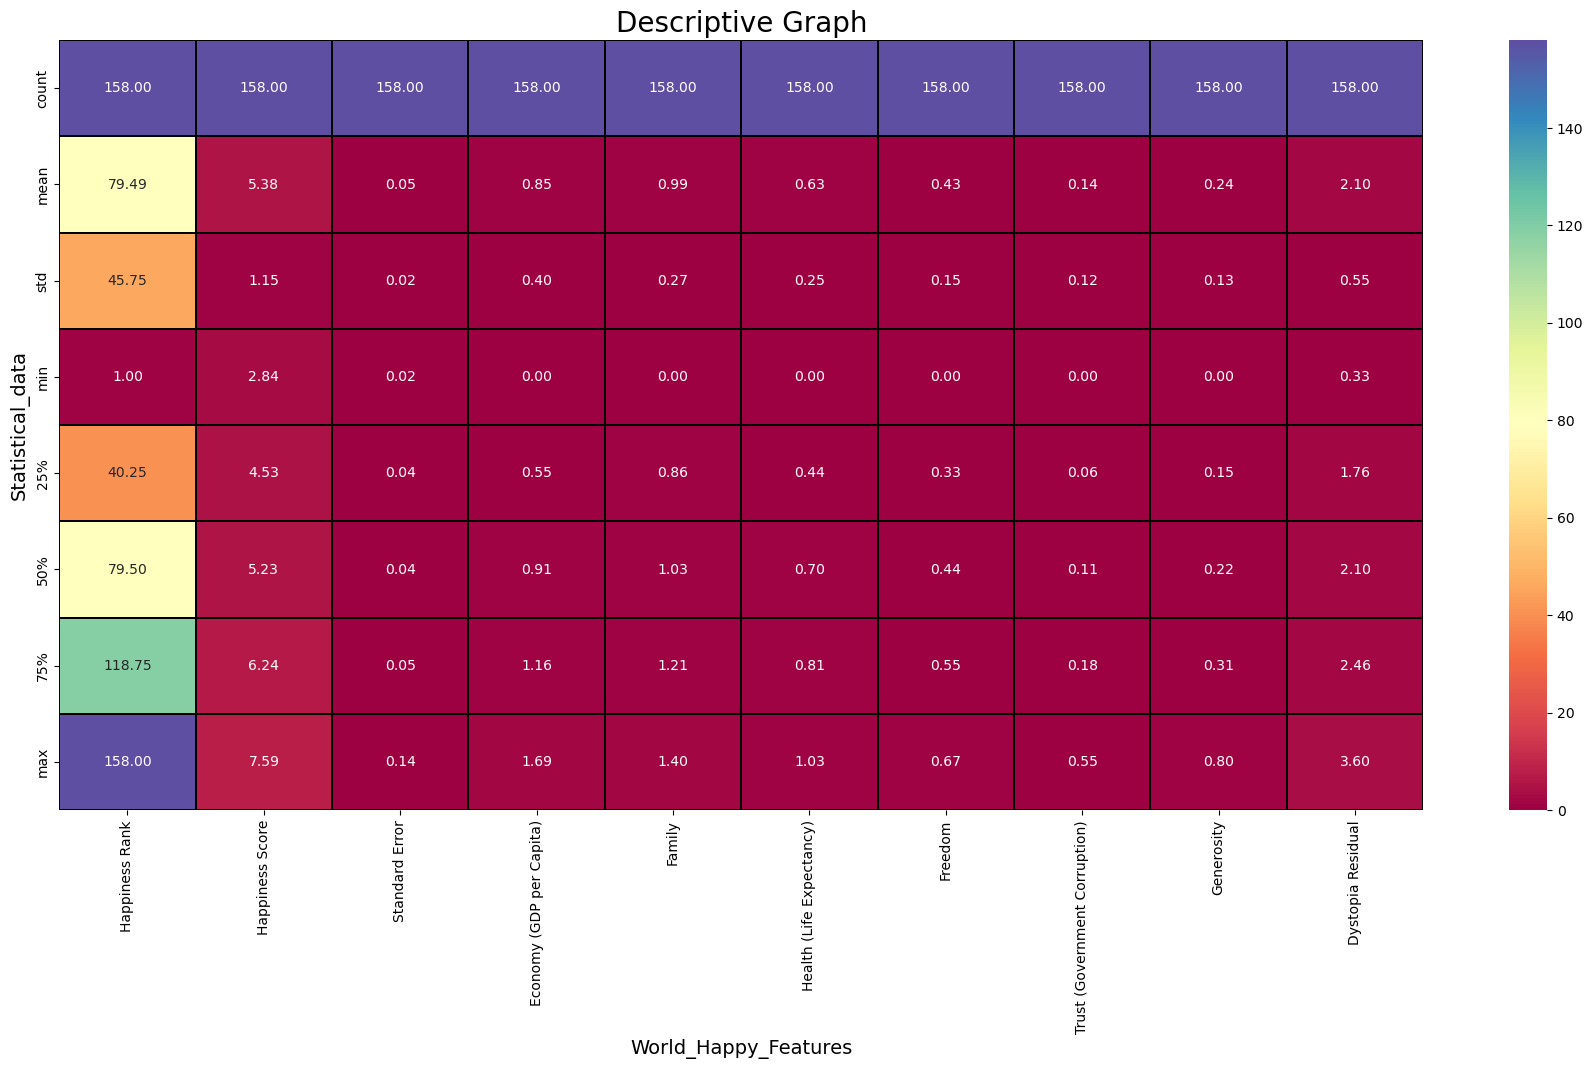

In [1012]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('World_Happy_Features',fontsize=14)
plt.ylabel('Statistical_data',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

## Graphing Features with two -variables

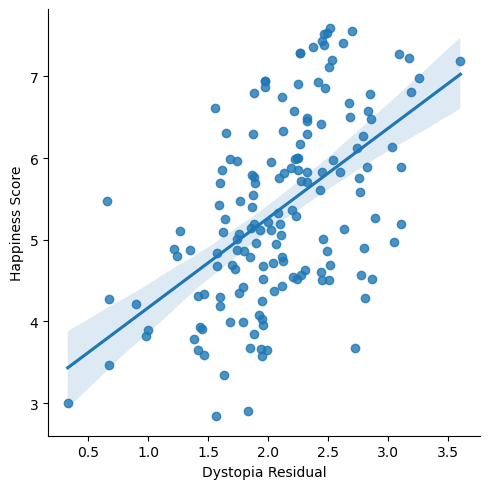

In [1013]:
#to plot data and regression model fits across 
sns.lmplot(x='Dystopia Residual',y='Happiness Score',data=df,palette='colorblind')

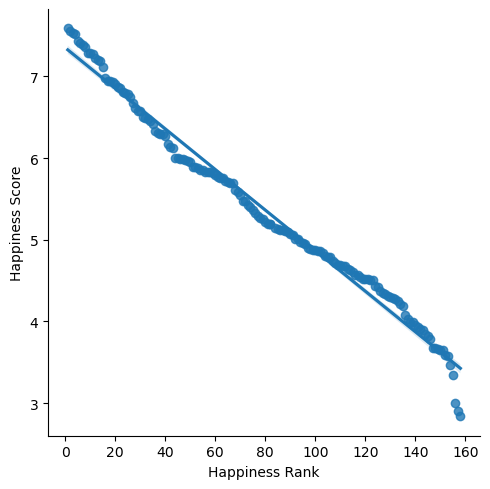

In [1014]:
sns.lmplot(x='Happiness Rank',y='Happiness Score',data=df,palette='colorblind')

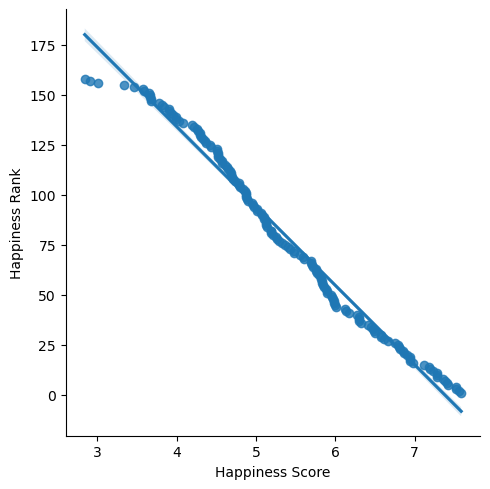

In [1015]:
sns.lmplot(x='Happiness Score',y='Happiness Rank',data=df,palette='colorblind')

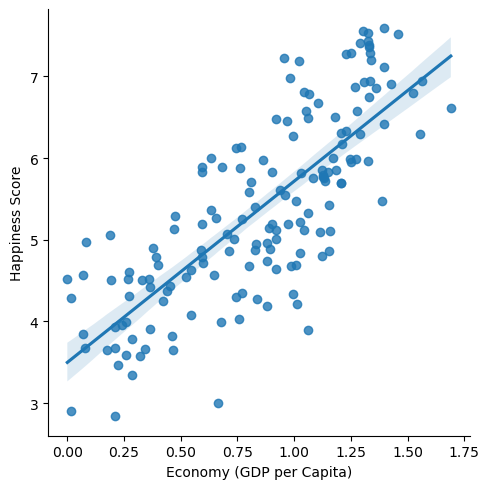

In [1016]:
sns.lmplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df,palette='colorblind')

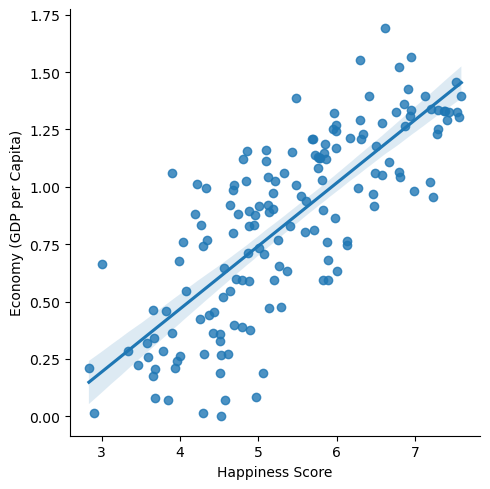

In [1017]:
sns.lmplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df,palette='colorblind')

We see strong linear graph when evaluating two values of Economy GDP with Happiness Score

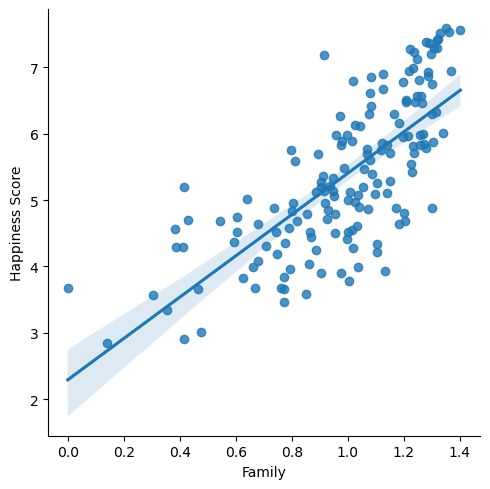

In [1018]:
sns.lmplot(x='Family',y='Happiness Score',data=df,palette='colorblind')

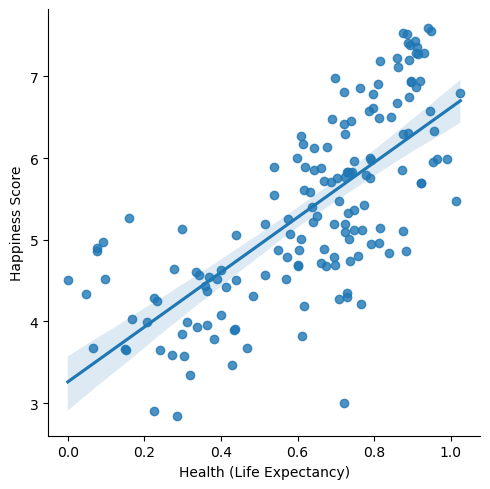

In [690]:
sns.lmplot(x= 'Health (Life Expectancy)',y='Happiness Score',data=df,palette='colorblind')

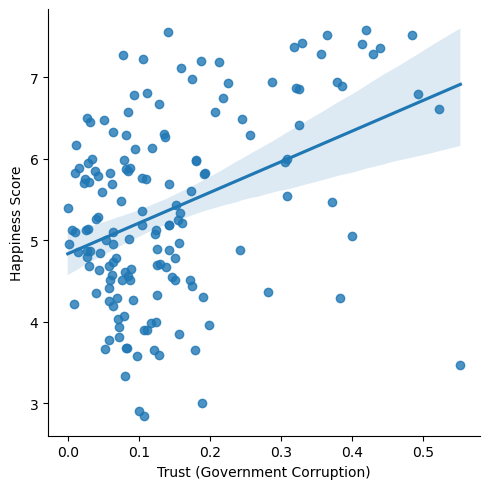

In [1019]:
sns.lmplot(x='Trust (Government Corruption)',y='Happiness Score',data=df,palette='colorblind')

Looking at the graphs above, shows that Economy GDP, Family life, Health has good correlation with Happiness score

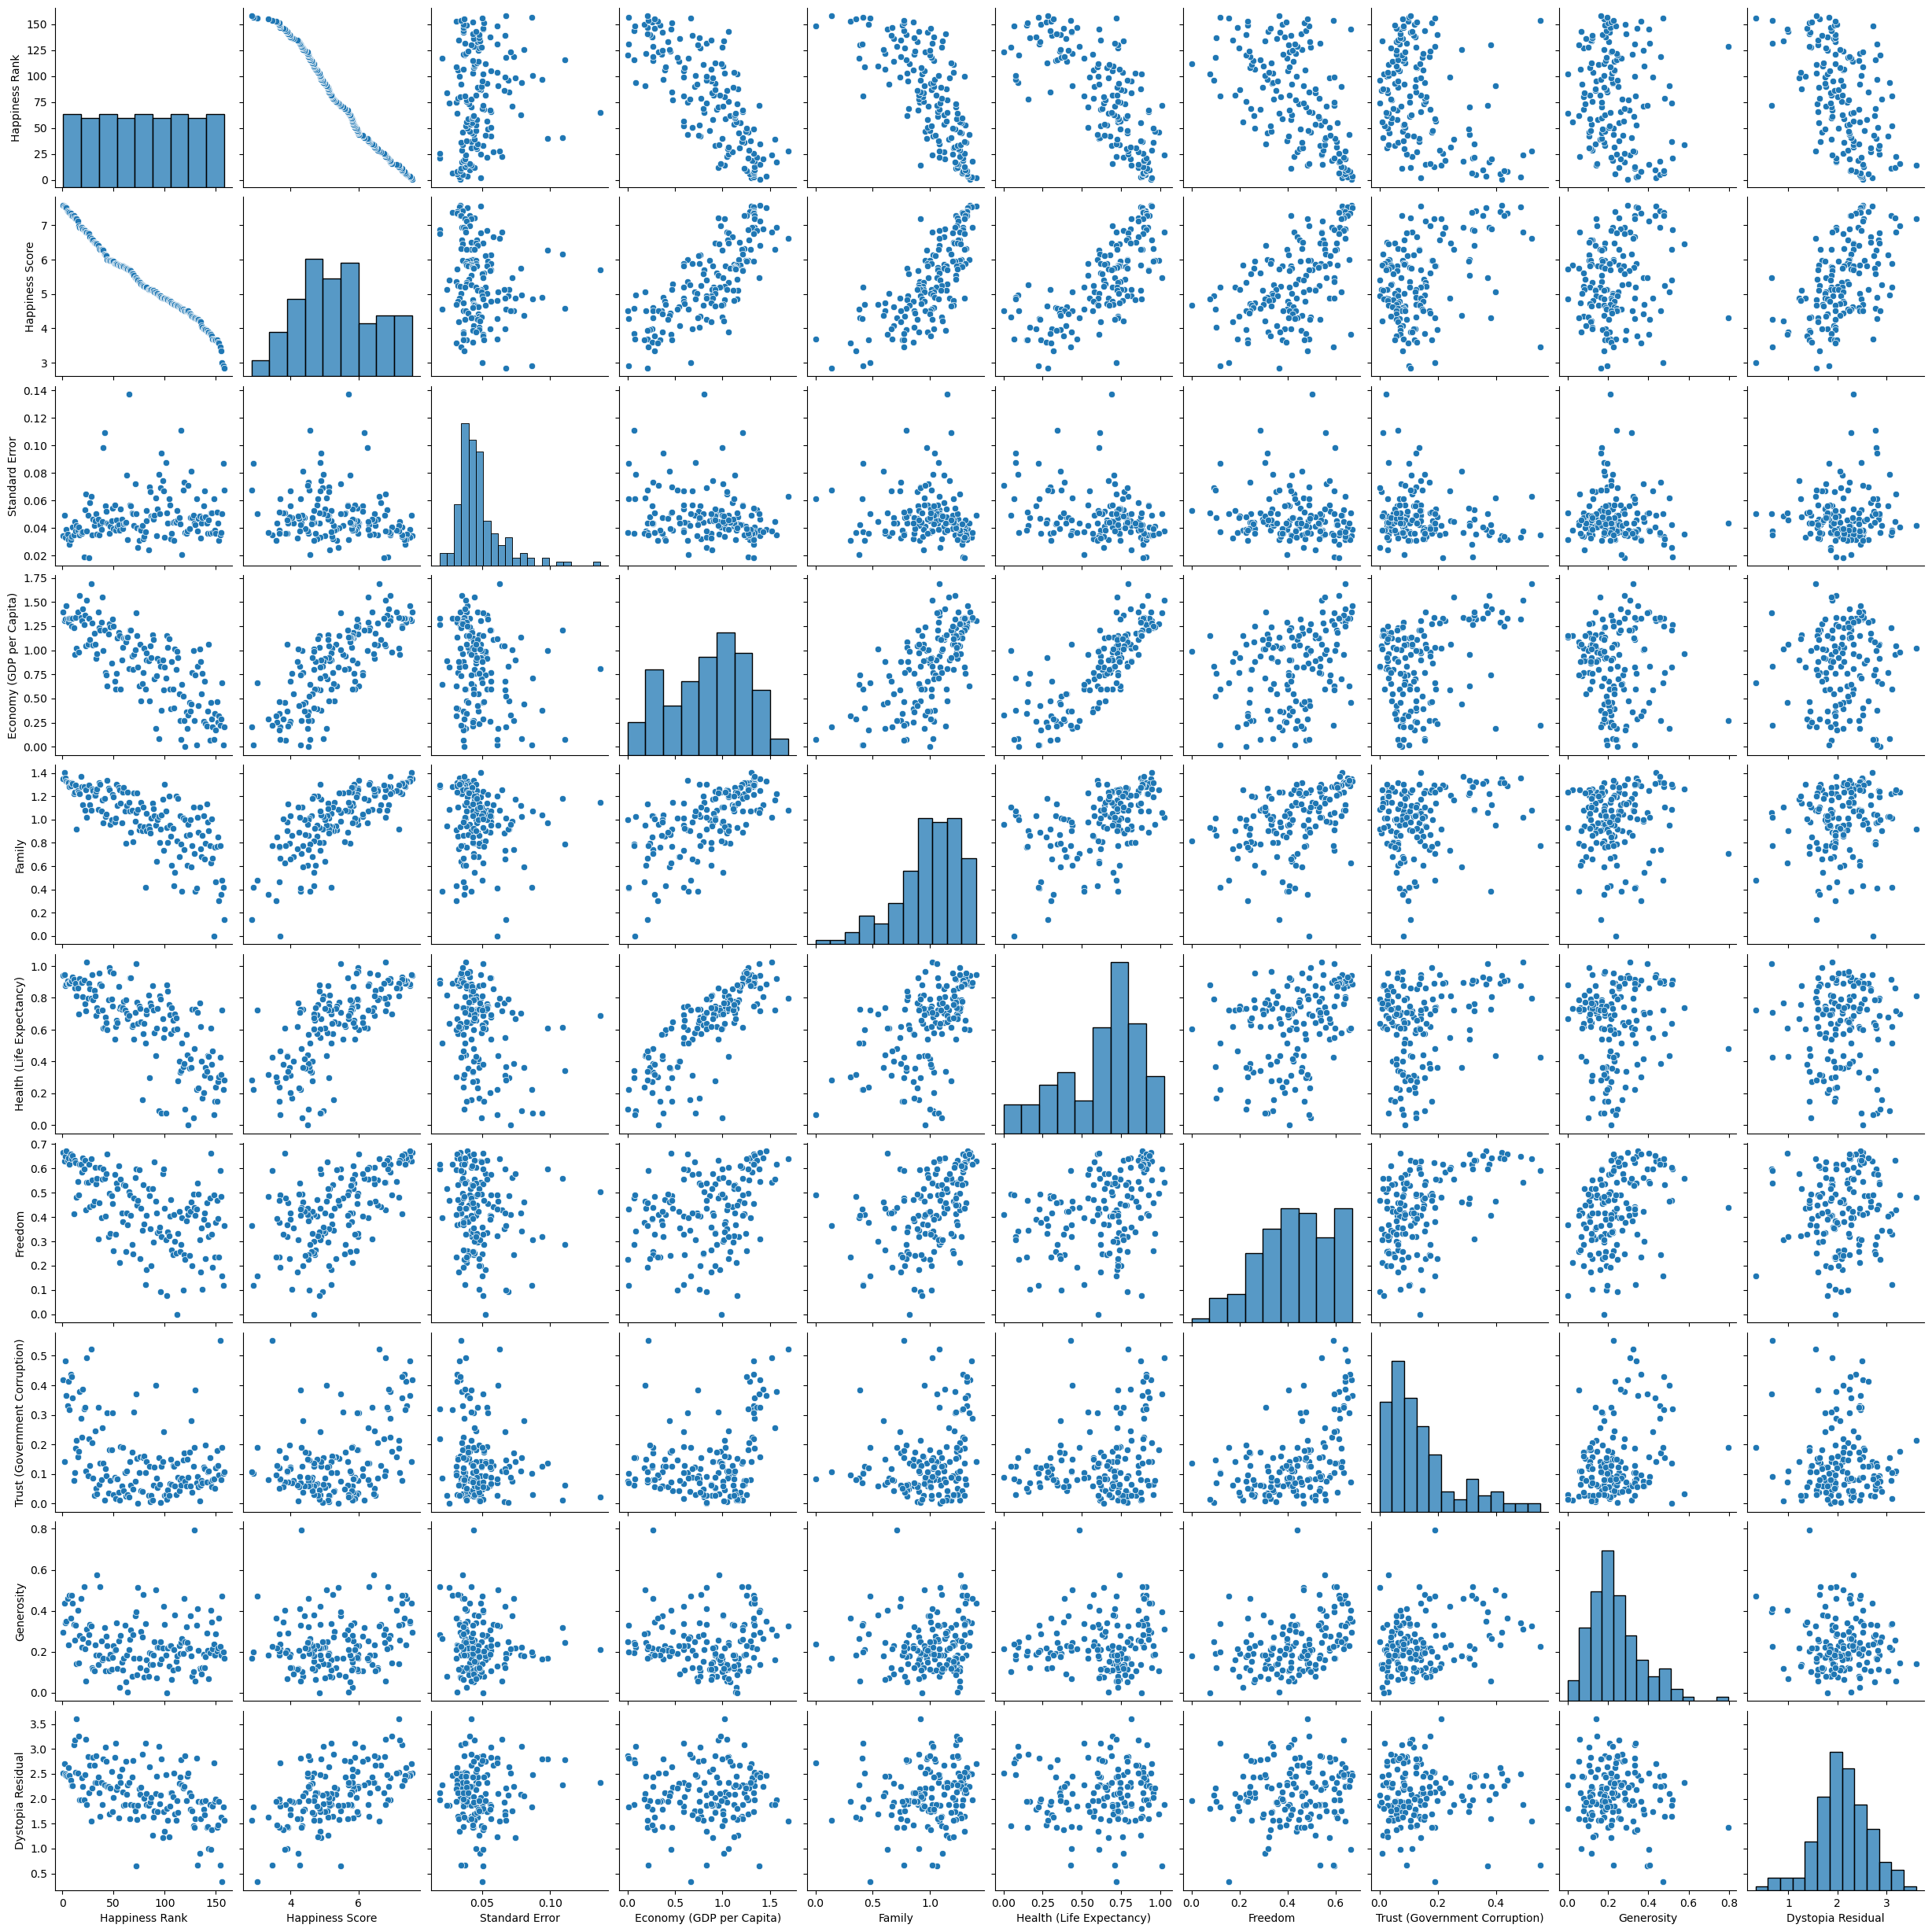

In [1021]:
sns.pairplot(df)

looking at the graphs, it seems continous data Country GDP with Happiness Score and Happiness Level 

Text(0, 0.5, 'Economy_GDP')

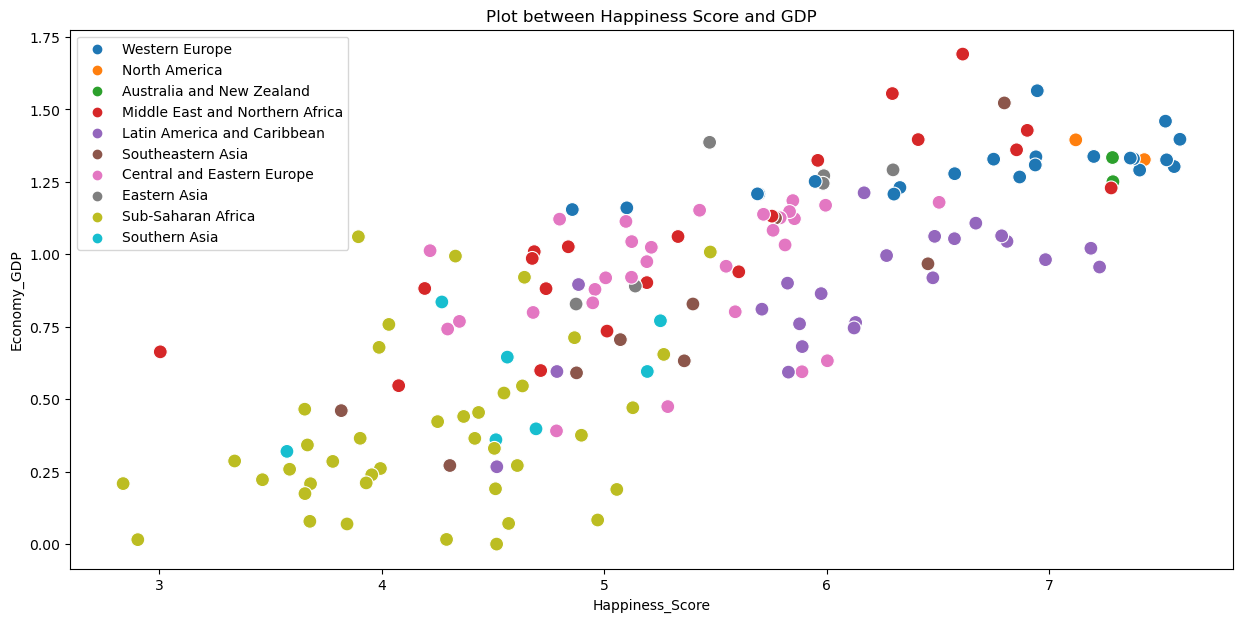

In [693]:
#Lets check Top countries with happiness score

plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(data=df,x= "Happiness Score",y= "Economy (GDP per Capita)",hue="Region",s=(100));
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness_Score')
plt.ylabel('Economy_GDP')

In [1022]:
gdp_region=df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

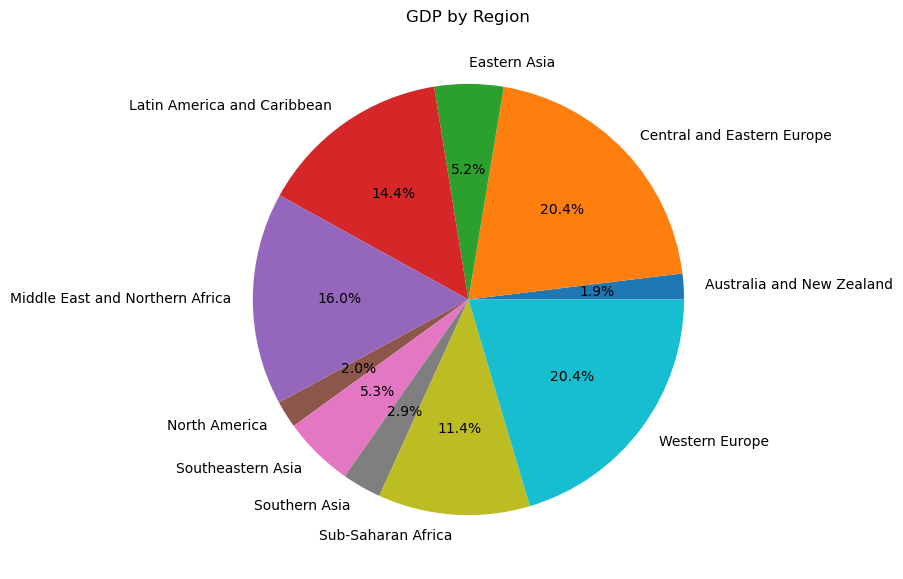

In [1023]:
#now we can plot a pie graph to see the %
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

We have Western Europe is contributing 20% in gdp economic growth. 

In [1025]:
#Total countries

total_country = df.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


<AxesSubplot:>

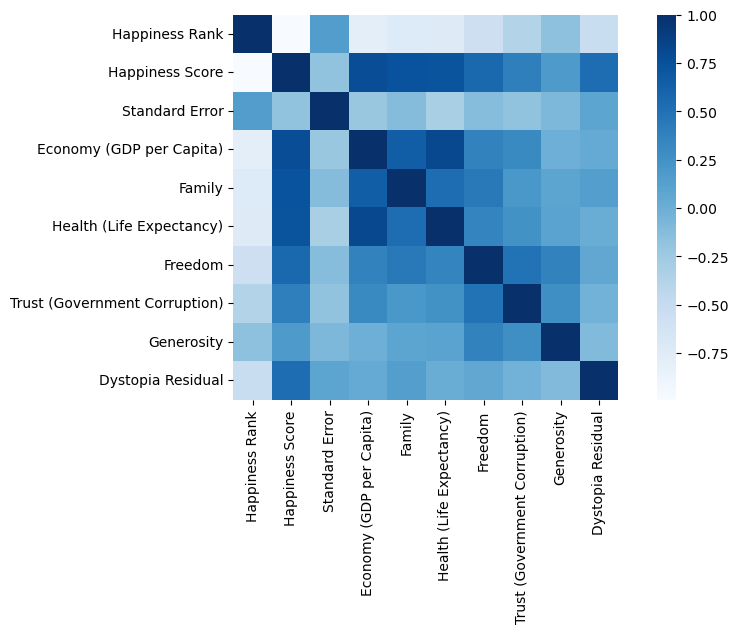

In [1026]:
#Correlation Map

cor = df.corr(method ="pearson")
f, ax=plt.subplots(figsize = (10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),
           cmap="Blues",square=True, ax= ax)

As per correlation graph we can see the strong points in dark blue and light colors with less correlation. Happiness score is strong with Economy, Family and Health.


<AxesSubplot:xlabel='Freedom', ylabel='Country'>

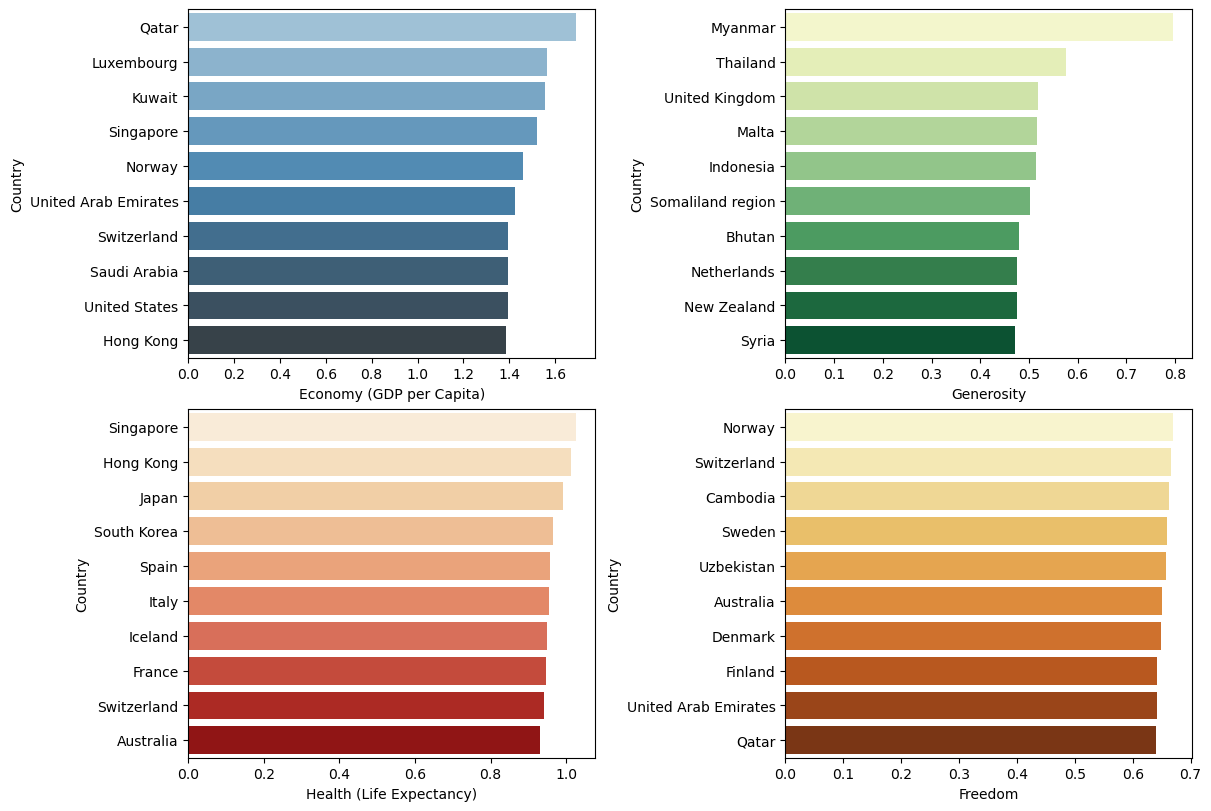

In [1027]:

#Now lets use bar graph to check each country with Economy GDP, Generosity, Health, Freedom and Government Trust, Dystopic Residual 


fig, ax1 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy (GDP per Capita)',y='Country',data=df.nlargest(10,'Economy (GDP per Capita)'),ax=ax1[0,0],palette="Blues_d")

sns.barplot(x='Generosity' ,y='Country',data=df.nlargest(10,'Generosity'),ax=ax1[0,1],palette="YlGn")

sns.barplot(x='Health (Life Expectancy)' ,y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),ax=ax1[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country',data=df.nlargest(10,'Freedom'),ax=ax1[1,1],palette='YlOrBr')



## Checking for Outlier

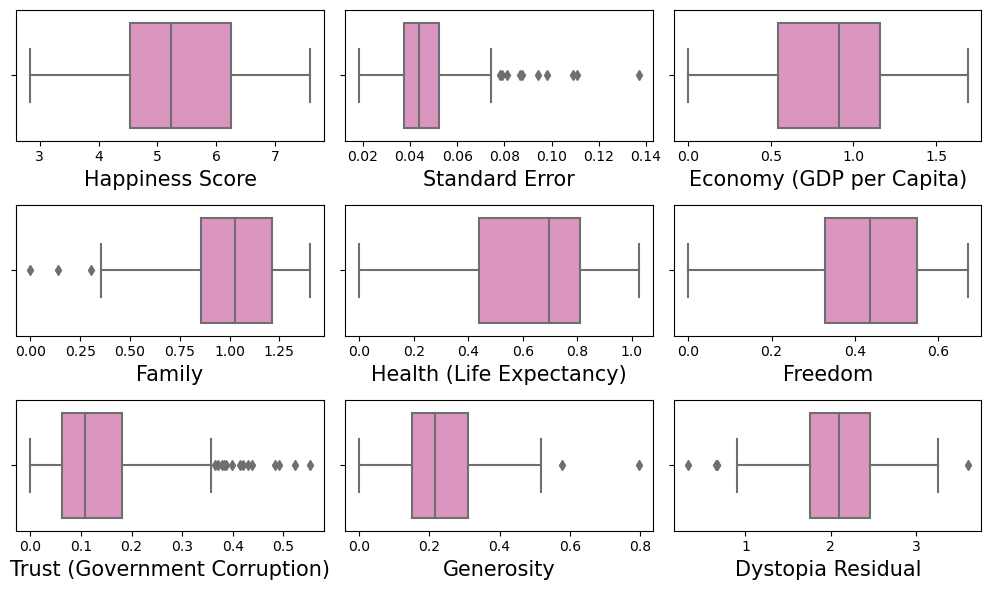

In [1028]:
#lets check the outliers by plotting boxplot of categorical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [1029]:
# Removing the outliers using zscore and IQR techniques before building the models and selected best one. 

from scipy.stats import zscore
out_features=df[['Economy (GDP per Capita)','Health (Life Expectancy)','Family','Trust (Government Corruption)','Standard Error','Generosity','Freedom']]
z=np.abs(zscore(out_features))
z

,Economy (GDP per Capita),Health (Life Expectancy),Family,Trust (Government Corruption),Standard Error,Generosity,Freedom
0,1.369621,1.263408,1.320281,2.309652,0.805926,0.471040,1.577438
1,1.135226,1.289434,1.514458,0.016480,0.055889,1.575856,1.332456
2,1.192861,0.992229,1.361054,2.842774,0.854487,0.824293,1.469659
3,1.525130,1.035145,1.251922,1.852081,0.531526,0.868638,1.605131
4,1.194876,1.118054,1.221204,1.555725,0.722845,1.748563,1.360416
...,...,...,...,...,...,...,...
153,1.552987,0.818610,0.800520,3.413922,0.774917,0.087228,1.087740
154,1.392303,1.263362,2.346860,0.529210,0.662582,0.433117,0.372033
155,0.455245,0.372199,1.901086,0.381419,0.132534,1.856891,1.809238
156,2.067566,1.649648,2.118467,0.357715,2.263962,0.316950,2.064472


In [1030]:
#threshold =3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 157], dtype=int64),
 array([3, 4, 4, 4, 5, 2, 3, 2], dtype=int64))

In [1031]:
z.iloc[119,0]

2.1056410077792718

In [1032]:
df1=df[(z<3).all(axis=1)]
df1.shape

(150, 12)

In [1033]:
#shape of old and new dataframe

print("old data frame",df.shape[0])
print("new data frame",df1.shape[0])

old data frame 158
new data frame 150


In [1034]:
print("Data loss percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage 5.063291139240507


it is affordable of data loss we now check IQR method to remove outlier

In [1035]:
# Select the first quantile

Q1=out_features.quantile(0.25)

# Select the third quantile
Q3=out_features.quantile(0.75)

IQR=Q3-Q1

df2=df[~((df<(Q1-1.5*IQR)) |(df>(Q3+1.5*IQR))).any(axis=1)]

In [1036]:
df2.shape

(129, 12)

In [1037]:
print("Data loss percentage after removing outliers with IQR method",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers with IQR method 18.354430379746837


In [1038]:
#Encoding categorical columns using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df    

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## Checking how the data has been distributed in each column

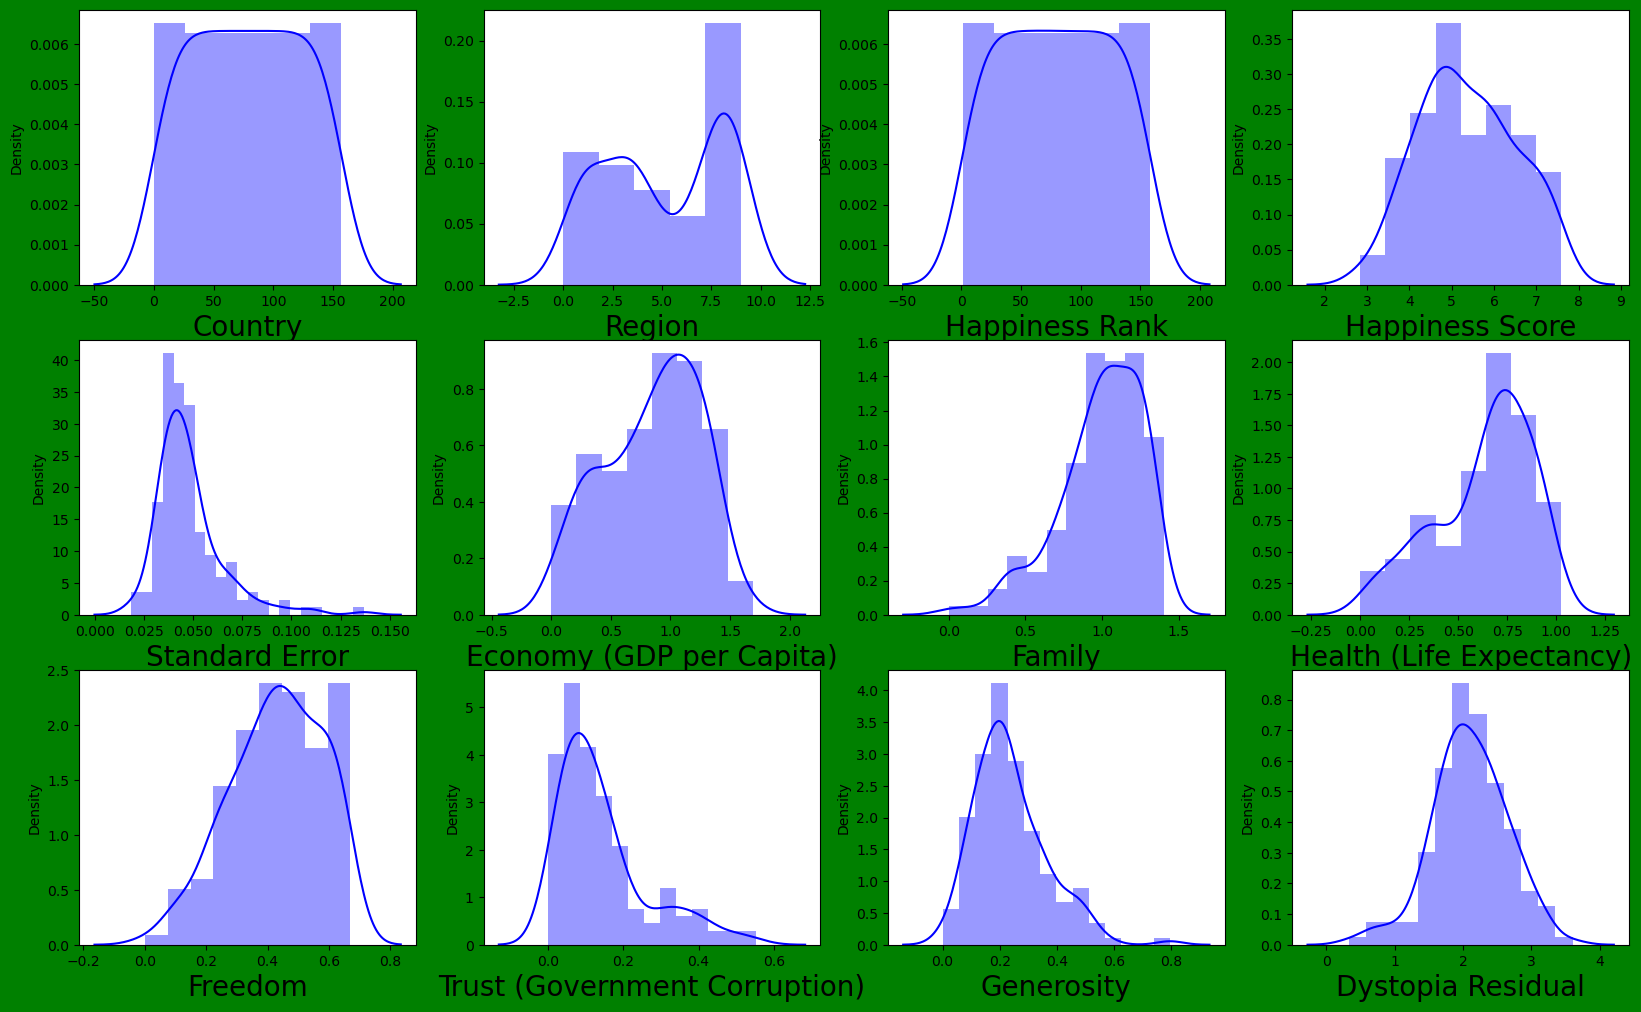

In [1039]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

There is skewness in Standard Error and Economy graph

In [1040]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness of quality column is 0.2 so the weight in the left tail of the distribution.

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [1041]:
#removing skewness using cuberoot method

df['Economy (GDP per Capita)']=np.cbrt(df['Economy (GDP per Capita)'])


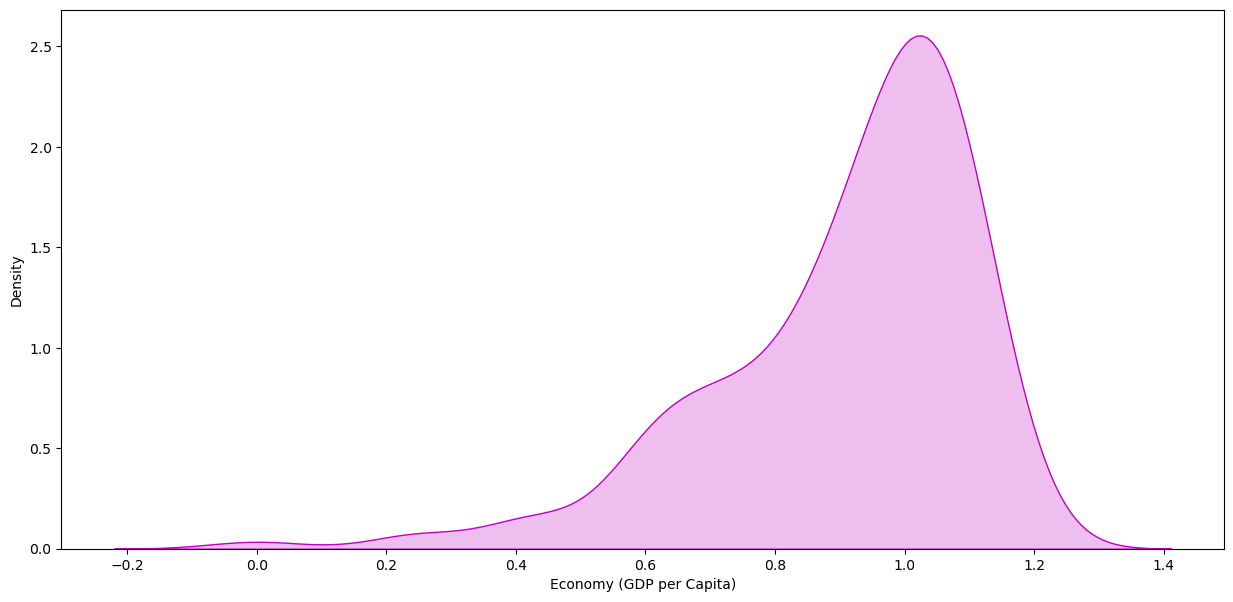

In [1042]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df['Economy (GDP per Capita)'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [1043]:
#removing skewness using cuberoot method

df['Standard Error']=np.cbrt(df['Standard Error'])


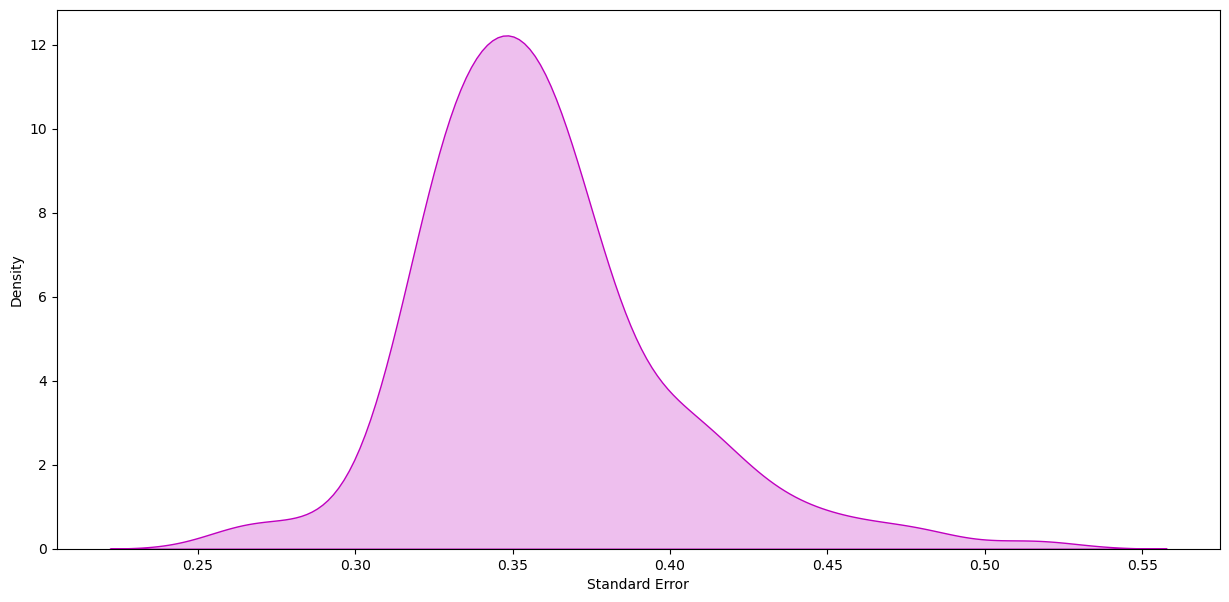

In [1044]:

sns.distplot(df['Standard Error'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()


In [1045]:
#removing skewness using cuberoot method

df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])


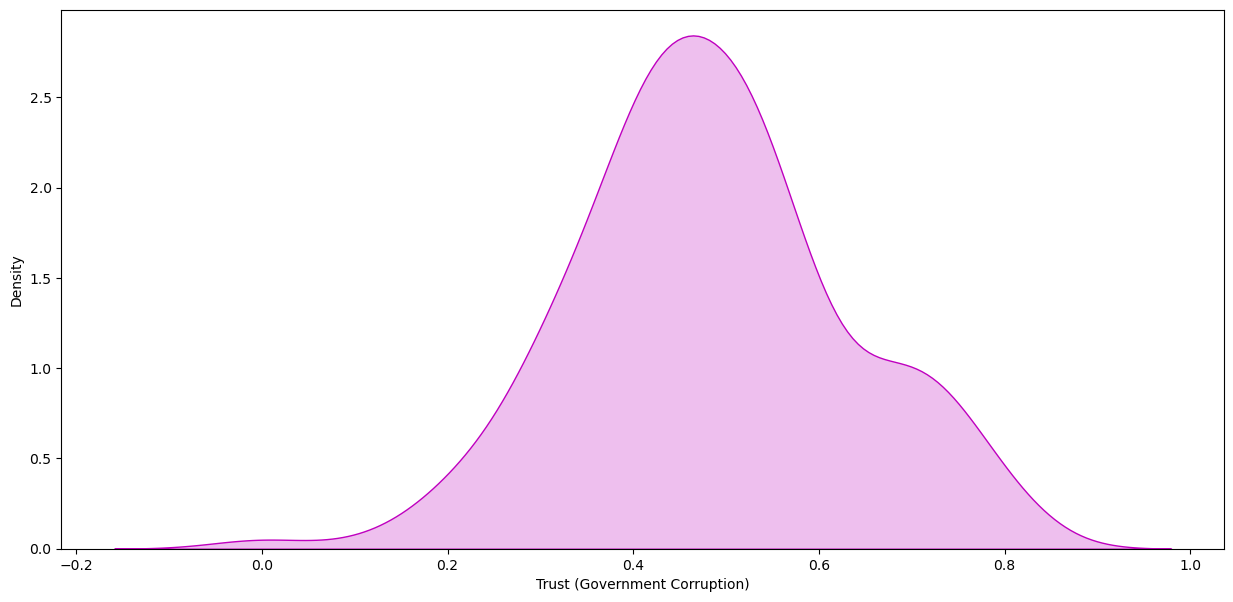

In [1046]:
sns.distplot(df['Trust (Government Corruption)'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

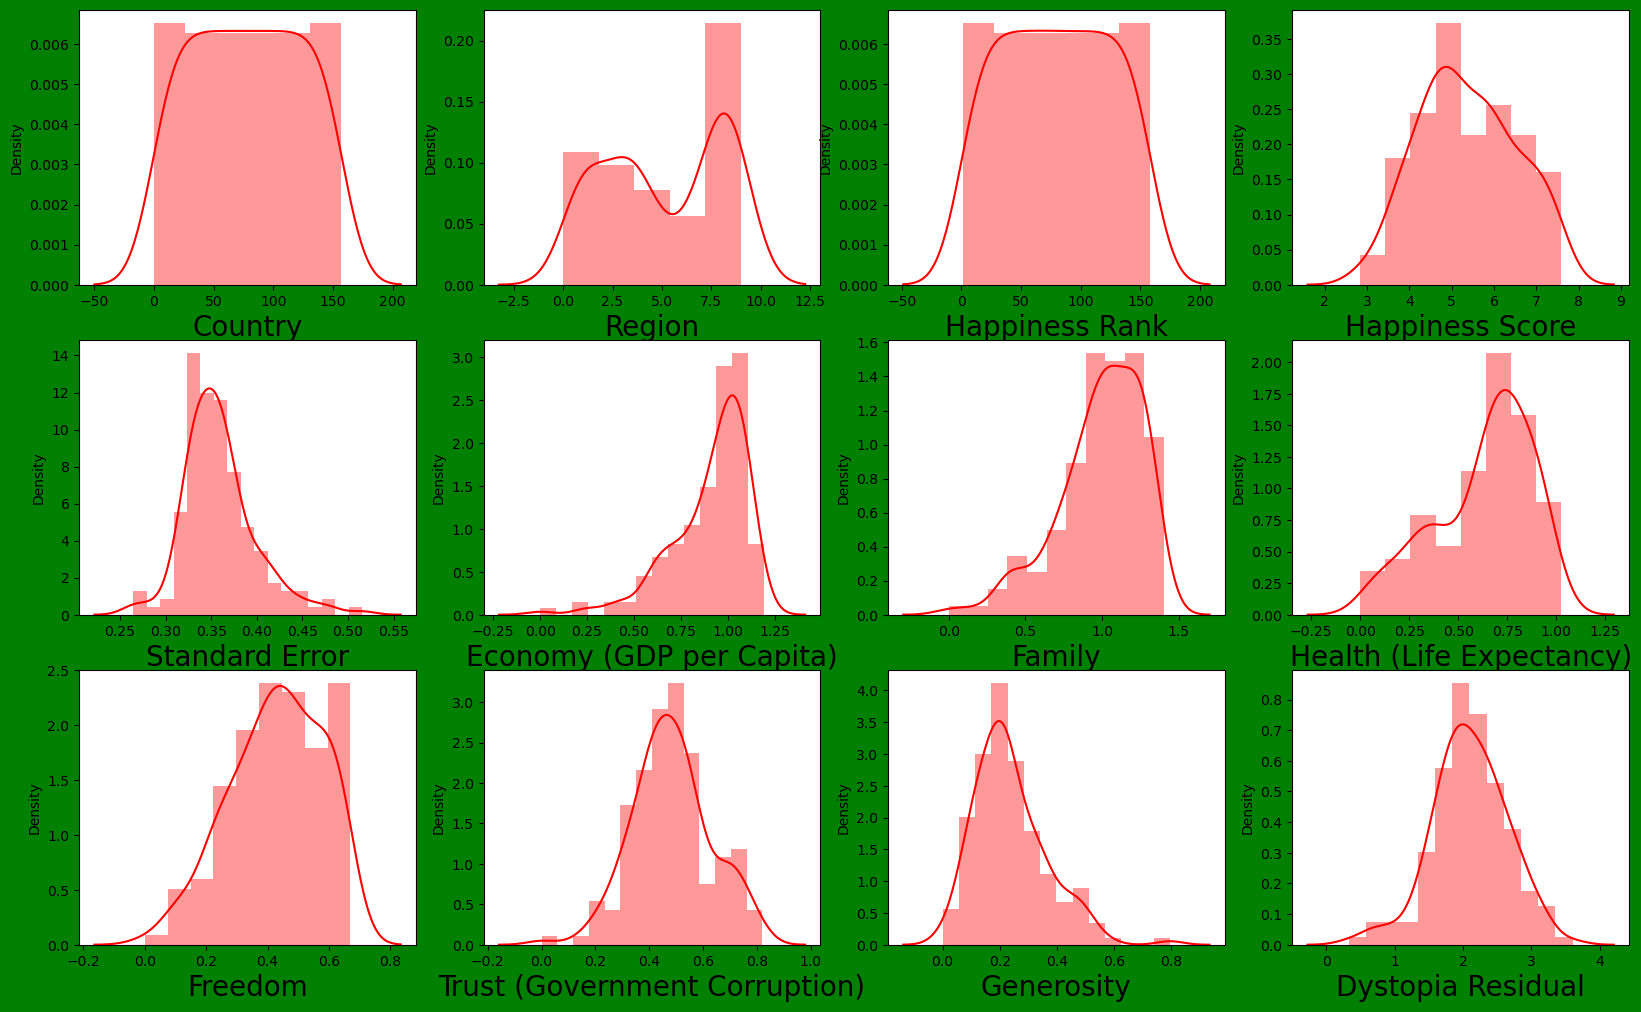

In [1047]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

### Correlation between target variable and independent variables

In [1048]:
#Now we will check the correlation target variable and independent variable
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.025445,0.049921,0.159416,0.037829,0.085684,0.059858,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.047720,-0.323437,-0.168533,-0.357508,0.092567,0.213506,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.182211,-0.710323,-0.733644,-0.735613,-0.556886,-0.304207,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.201754,0.704171,0.740605,0.724200,0.568211,0.326229,0.180319,0.530474
Standard Error,0.025445,-0.047720,0.182211,-0.201754,1.000000,-0.216526,-0.132005,-0.321062,-0.159027,-0.158530,-0.112492,0.063299
Economy (GDP per Capita),0.049921,-0.323437,-0.710323,0.704171,-0.216526,1.000000,0.602142,0.786247,0.328457,0.127129,-0.047712,-0.006374
Family,0.159416,-0.168533,-0.733644,0.740605,-0.132005,0.602142,1.000000,0.531104,0.441518,0.131653,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.321062,0.786247,0.531104,1.000000,0.360477,0.149556,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.159027,0.328457,0.441518,0.360477,1.000000,0.461105,0.373916,0.062783
Trust (Government Corruption),0.059858,0.213506,-0.304207,0.326229,-0.158530,0.127129,0.131653,0.149556,0.461105,1.000000,0.238464,0.010769


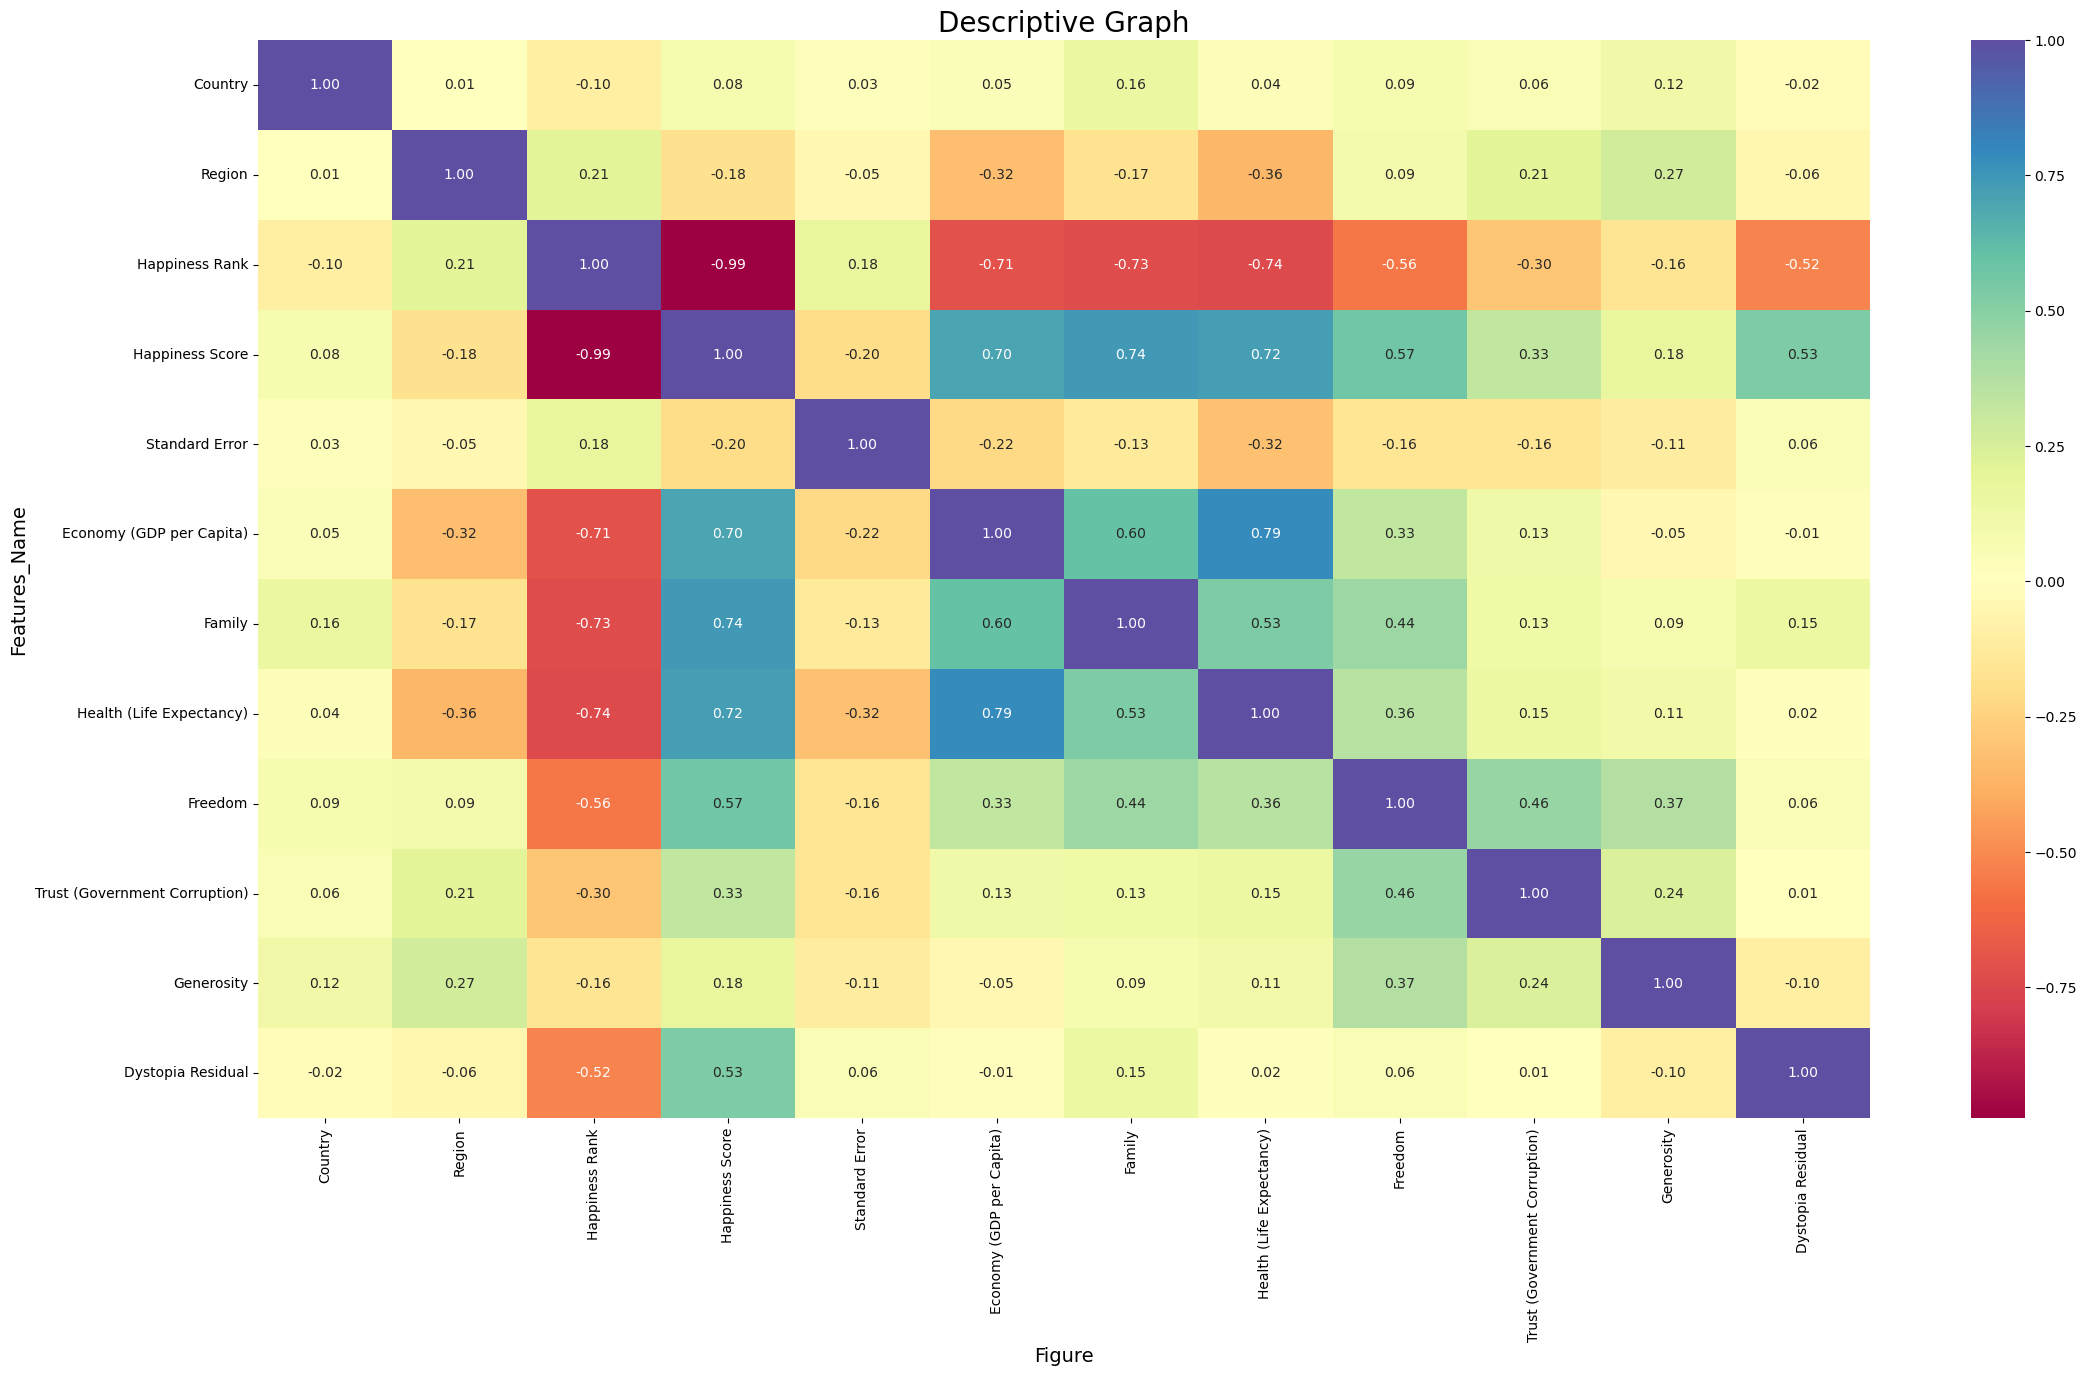

In [1049]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot =True, fmt ='0.2f',linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

we can see the positive and negative correlated features with the target

In [1050]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.201754
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.326229
Dystopia Residual                0.530474
Freedom                          0.568211
Economy (GDP per Capita)         0.704171
Health (Life Expectancy)         0.724200
Family                           0.740605
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

In [1132]:
df1.describe

<bound method NDFrame.describe of      Country  Region  Happiness Rank  Happiness Score  Standard Error  \
0      129.0     9.0               1                7         0.03411   
1       57.0     9.0               2                7         0.04884   
2       36.0     9.0               3                7         0.03328   
3      101.0     9.0               4                7         0.03880   
4       24.0     5.0               5                7         0.03553   
..       ...     ...             ...              ...             ...   
151     20.0     8.0             152                3         0.04324   
152      0.0     7.0             153                3         0.03084   
154     13.0     8.0             155                3         0.03656   
155    130.0     4.0             156                3         0.05015   
156     21.0     8.0             157                2         0.08658   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0           

## Visualizing the correlation between label and features using bar plot 

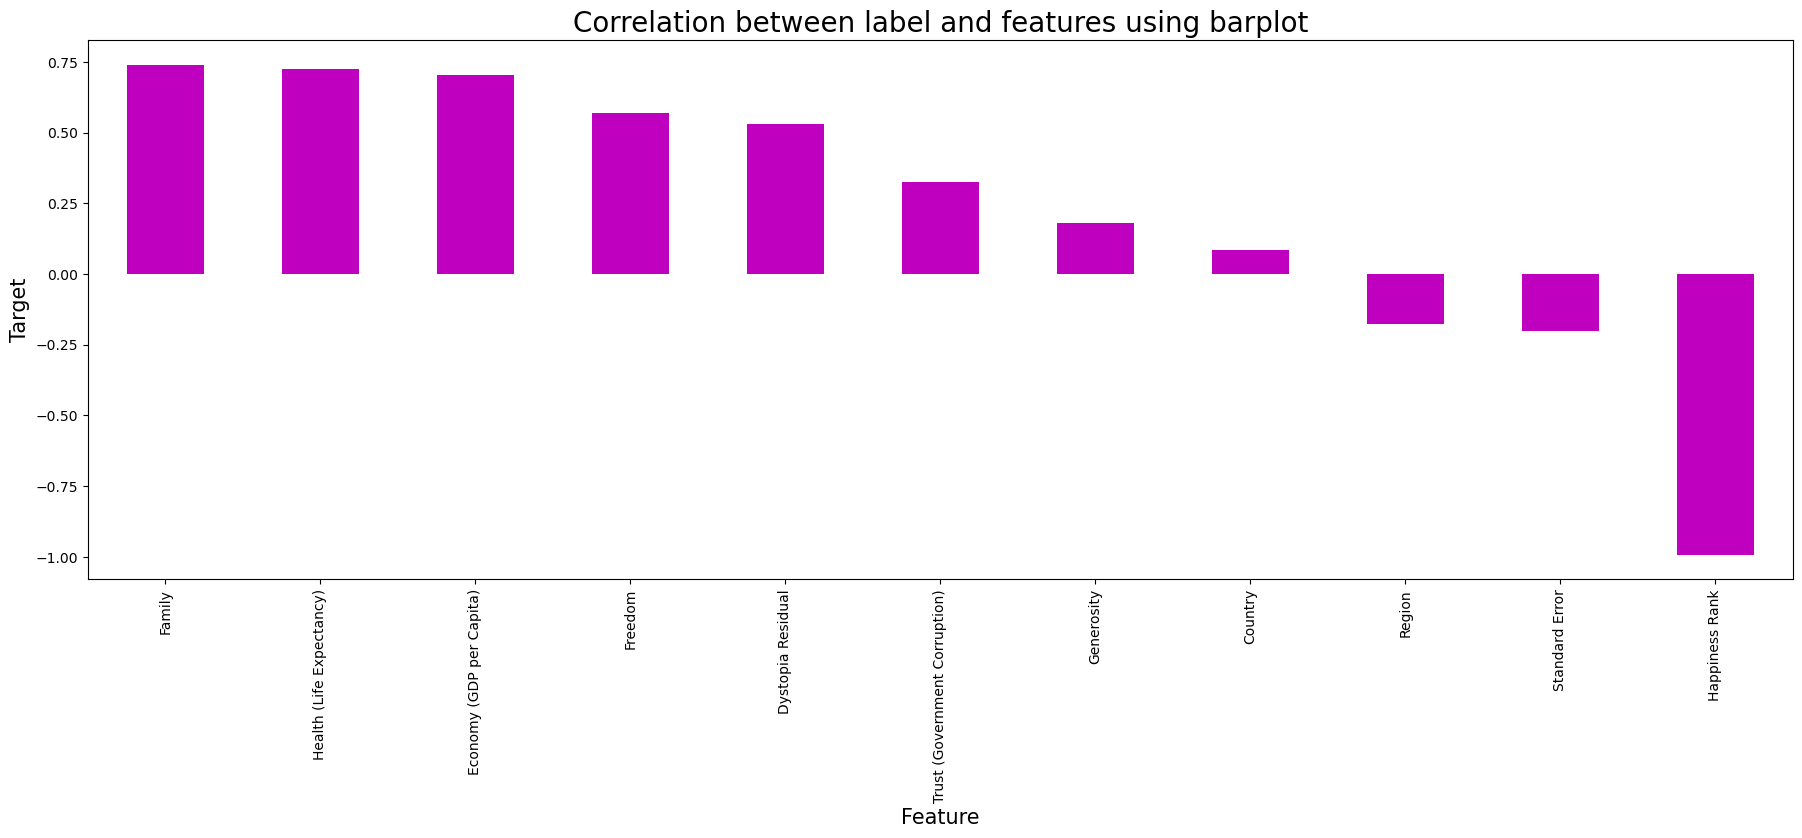

In [1051]:
plt.figure(figsize = (22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color ="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()
        

In [1119]:
#Encoding categorical columns using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i]= OE.fit_transform(df1[i].values.reshape(-1,1))
df1 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,129.0,9.0,1,7,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,57.0,9.0,2,7,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,36.0,9.0,3,7,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,101.0,9.0,4,7,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
151,20.0,8.0,152,3,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153,3,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,130.0,4.0,156,3,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


We can observe the positive and negative correlated features with the target.

## Seperating features and label

In [1120]:
#Seperating the independent and target variables into x and y
x = df1.drop(["Happiness Score","Country","Region"],axis=1)
y = df1["Happiness Score"].astype(int)

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (150, 9)
Label Dimension (150,)


## Feature Scaling using Standard Scalarization

In [1121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-1.713900,-0.871331,1.388762,1.356364,1.236779,1.584036,2.476127,0.527620,0.753453
1,-1.691682,0.184375,1.144569,1.563966,1.263008,1.341075,0.006394,1.683645,1.094020
2,-1.669464,-0.930818,1.204613,1.399956,0.963481,1.477147,3.042161,0.897247,0.706711
3,-1.647246,-0.535197,1.550771,1.283278,1.006732,1.611501,1.990309,0.943647,0.657405
4,-1.625028,-0.769559,1.206713,1.250437,1.090289,1.368804,1.675658,1.864357,0.632411
...,...,...,...,...,...,...,...,...,...
145,1.641025,-0.216980,-1.562576,-0.603215,-1.505528,-0.202784,-0.110114,-0.129521,-1.187868
146,1.663243,-1.105694,-1.402615,-2.765197,-1.374178,-1.264352,-0.386342,1.093701,-0.289257
147,1.707679,-0.695739,-1.488610,-2.564329,-1.309731,0.388575,-0.537989,-0.418445,-0.877350
148,1.729897,0.278263,-0.512384,-2.087734,0.338608,-1.774703,0.428857,1.977706,-3.283988


We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

In [1122]:
y.value_counts()

y

0      7
1      7
2      7
3      7
4      7
      ..
151    3
152    3
154    3
155    3
156    2
Name: Happiness Score, Length: 150, dtype: int32

## Checking Variance Inflation Factor(VIF)


In [1123]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)

In [1124]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,76.659700,Happiness Rank
1,1.207506,Standard Error
2,12.340560,Economy (GDP per Capita)
3,5.926016,Family
4,8.703584,Health (Life Expectancy)
5,3.160773,Freedom
6,1.897580,Trust (Government Corruption)
7,2.017854,Generosity
8,18.364502,Dystopia Residual


In [1125]:
#Again checking VIF value to confirm whether the multicollinearity still exists

vif = pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Freatures"]=x.columns
vif


,VIF values,Freatures
0,76.659700,Happiness Rank
1,1.207506,Standard Error
2,12.340560,Economy (GDP per Capita)
3,5.926016,Family
4,8.703584,Health (Life Expectancy)
5,3.160773,Freedom
6,1.897580,Trust (Government Corruption)
7,2.017854,Generosity
8,18.364502,Dystopia Residual


In [1126]:
y.value_counts()


5    48
4    42
6    27
3    17
7    15
2     1
Name: Happiness Score, dtype: int64

# Modeling

Finding the best random state

In [1139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Creating train test split

In [1147]:
#finding the best Random state

maxAccu =0
maxRS = 0
for i in range(1,160):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc >maxAccu:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is ",maxAccu, "at random_state",maxRS)
        


Max r2 score accuracy is  0 at random_state 159


In [1148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=maxRS)

# Random Forest Classifier

In [1110]:
#Checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.9111111111111111
[[ 0  1  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0 15  1  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  2  1]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.75      1.00      0.86         3
           4       1.00      0.94      0.97        16
           5       0.94      1.00      0.97        15
           6       0.78      1.00      0.88         7
           7       1.00      0.33      0.50         3

    accuracy                           0.91        45
   macro avg       0.74      0.71      0.69        45
weighted avg       0.91      0.91      0.89        45



# Logistic Regression

In [1086]:

LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7333333333333333
[[ 0  1  0  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  1 11  4  0  0]
 [ 0  0  1 14  0  0]
 [ 0  0  0  2  5  0]
 [ 0  0  0  0  2  1]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.50      0.67      0.57         3
           4       0.85      0.69      0.76        16
           5       0.70      0.93      0.80        15
           6       0.71      0.71      0.71         7
           7       1.00      0.33      0.50         3

    accuracy                           0.73        45
   macro avg       0.63      0.56      0.56        45
weighted avg       0.75      0.73      0.72        45



# Support Vector Machine Classifier

In [1087]:
#Checking accuracy for support vector machine classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.8222222222222222
[[ 0  0  1  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  3 12  0  0]
 [ 0  0  1  1  5  0]
 [ 0  0  0  0  2  1]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         3
           4       0.76      1.00      0.86        16
           5       0.92      0.80      0.86        15
           6       0.71      0.71      0.71         7
           7       1.00      0.33      0.50         3

    accuracy                           0.82        45
   macro avg       0.73      0.64      0.66        45
weighted avg       0.82      0.82      0.80        45



# AdaBoost Classifier

In [1088]:
#checking accuracy for Adaboost classifier

ABC =AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8
[[ 0  1  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0 15  1  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  0  3]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.75      1.00      0.86         3
           4       1.00      0.94      0.97        16
           5       0.65      1.00      0.79        15
           6       0.00      0.00      0.00         7
           7       1.00      1.00      1.00         3

    accuracy                           0.80        45
   macro avg       0.57      0.66      0.60        45
weighted avg       0.69      0.80      0.73        45



# # Bagging Classifier

In [1089]:
#checking accuracy for Bagging classifier

BC =BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))


0.9555555555555556
[[ 0  1  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0 15  1  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0  3]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.75      1.00      0.86         3
           4       1.00      0.94      0.97        16
           5       0.94      1.00      0.97        15
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         3

    accuracy                           0.96        45
   macro avg       0.78      0.82      0.80        45
weighted avg       0.94      0.96      0.95        45



# ExtraTreesClassifier

In [1090]:
#Checking accuracy for ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))


0.9111111111111111
[[ 0  1  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  1 14  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  2  1]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.75      1.00      0.86         3
           4       0.94      1.00      0.97        16
           5       1.00      0.93      0.97        15
           6       0.78      1.00      0.88         7
           7       1.00      0.33      0.50         3

    accuracy                           0.91        45
   macro avg       0.74      0.71      0.69        45
weighted avg       0.91      0.91      0.89        45



# Cross Validation Score

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. 

In [1091]:
from sklearn.model_selection import cross_val_score

cv=5--- it's a fold value  1, 2, 3, 4, 5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafulat scoring parameter is - r2 score


In [1112]:
#Checking cv score for Random Forest Classifier

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predRFC)-score.mean())


[0.56666667 0.96666667 1.         0.93333333 0.53333333]
0.8
Difference between Accuracy score and cross validation score is - 0.11111111111111105


In [1093]:
#Checking cv score for Logistic Regression

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predLR)-score.mean())


[0.7        0.86666667 0.93333333 0.73333333 0.5       ]
0.7466666666666667
Difference between Accuracy score and cross validation score is - -0.01333333333333342


In [1094]:
#Checking cv score for Support Vector Machine Classifier

score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predsvc)-score.mean())


[0.6        0.83333333 0.86666667 0.56666667 0.33333333]
0.6399999999999999
Difference between Accuracy score and cross validation score is - 0.18222222222222229


In [1095]:
#Checking cv score for Bagging Classifier
BC = BaggingClassifier()
#predBC = BC.predict(x_test)

score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predBC)-score.mean())


[0.5        1.         1.         1.         0.46666667]
0.7933333333333333
Difference between Accuracy score and cross validation score is - 0.16222222222222227


In [1096]:
#Checking cv score for Extra Trees Classifier

ET = ExtraTreesClassifier()

score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predET)-score.mean())


[0.56666667 0.96666667 1.         0.83333333 0.43333333]
0.76
Difference between Accuracy score and cross validation score is - 0.15111111111111108


Random Forest Classifier is the best model to give us higher accuray of
0.8. Difference between Accuracy score and cross validation score is - 0.11111

# Hyperparameter Tuning
Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [1149]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {
    "n_estimators": [90,100,115,130],
    'criterion': ['grini','entropy'],
    'max_depth':range(2,20,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
     'max_features':['auto','log2']
}


In [1150]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {'n_neighbors': [3,5,7,9,11,13],'weights': ['uniform', 'distance'],'p': [1,2]}


GVC = GridSearchCV(estimator=knn,param_grid=params,cv=5,n_jobs=5,verbose=1)

In [1151]:
GCV=GridSearchCV(SVC(),parameters, cv =5)

In [1152]:
# Fitting our GridSearchCV Object
GVC.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [1153]:
GVC.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [1163]:
Final_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
Final_model.fit(x_train, y_train)
predictions = Final_model.predict(x_test)
predictions

#rf_model.predict_proba(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

94.94530389074218


# saving the model

In [1164]:
import joblib
joblib.dump(Final_model,"World_Happiness_Report.pkl")

['World_Happiness_Report.pkl']

# Predicting the saved model

In [1165]:
#Lets load the saved model and get the prediction

model = joblib.load("World_Happiness_Report.pkl")

#Prediction
prediction = model.predict(x_test)
prediction


array([7, 6, 6, 4, 5, 5, 4, 4, 6, 3, 4, 3, 5, 5, 3, 6, 4, 5, 4, 4, 7, 5,
       4, 3, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 5, 7, 7, 7, 6, 5, 7, 5, 3, 4,
       7])

In [1166]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,7,7
1,6,6
2,6,6
3,4,4
4,5,5
5,5,5
6,4,4
7,4,4
8,6,6
9,3,3


Our Regression Forest model does the best accuracy of 94% hence, this is the best model to evaluate the result of Happy scoring considering all the variables.  